In [1]:
# importar as bibliotecas necessárias
import numpy as np # arrays
import matplotlib.pyplot as plt # plots
plt.rcParams.update({'font.size': 14})

# Definir um sinal no tempo

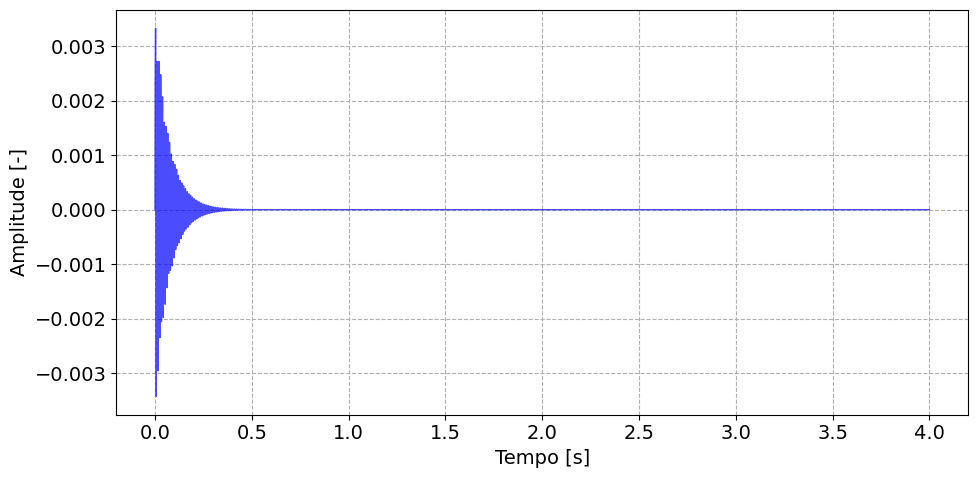

In [2]:
fs = 2000
Tp = 4
time = np.arange(start = 0, stop = Tp, step = 1/fs)

#freq = 800
#xt = 1.1 * np.sin(2*np.pi*freq*time) + np.random.normal(0, 0.1, len(time))

A = [2.3, 1.5]
f_res = [110, 415]
w_res = 2*np.pi*np.array(f_res)
zeta = [0.02, 0.01]
wd = np.sqrt(1-np.array(zeta)**2)*np.array(w_res)
# Reference impulse response
xt=(A[0]/wd[0])*np.exp(-zeta[0]*w_res[0]*time)*np.sin(wd[0]*time) +\
    (A[1]/wd[1])*np.exp(-zeta[1]*w_res[1]*time)*np.sin(wd[1]*time)
xt_rms = np.sqrt(np.sum(xt**2))/len(xt)
xt = xt+np.random.normal(0, 0.2*xt_rms, len(time))


# Figure
plt.figure(figsize = (10,5))
plt.plot(time, xt, '-b', linewidth = 1, alpha = 0.7)
plt.grid(linestyle = '--', which='both')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude [-]')
#plt.xlim((0, 5/freq))
plt.tight_layout()
plt.show()

In [3]:
xt.shape

(8000,)

# Via FFT

A FFT é um algoritmo eficiente, com ordem de calulo de

\begin{equation}
\mathcal{O}(N \text{log}N)
\end{equation}

Entao, ao dobrar o numero de amostras no sinal $N\text{log}N = 1.39$

In [20]:
%%timeit -r 1 -n 5
Xk = np.fft.fft(xt)

208 μs ± 0 ns per loop (mean ± std. dev. of 1 run, 5 loops each)


In [42]:
1.39*120

166.79999999999998

In [21]:
Xk = np.fft.fft(xt)

# Via DFT (Matrix)

Neste caso a matriz da DFT vai ter $N \times N$ elementos. A ordem de calculo é

\begin{equation}
\mathcal{O}(N^2)
\end{equation}

Entao, ao dobrar o numero de amostras no sinal $N^2 = 4.00$.

In [23]:
def my_dft_matrix(xn):
    """ Computes a DFT matrix without any zero padding
    """
    N = len(xn)
    k = np.arange(N)
    n = np.arange(N)
    
    Wkn = np.exp(-1j*(2*np.pi/N)*np.outer(k,n))
    return Wkn

In [25]:
%%timeit -r 1 -n 5
Wkn = my_dft_matrix(xt)
Xk_myfft = Wkn @ xt

5.07 s ± 0 ns per loop (mean ± std. dev. of 1 run, 5 loops each)


In [24]:
Wkn = my_dft_matrix(xt)
Wkn.shape

(8000, 8000)

In [30]:
4/200e-6


20000.0

In [29]:
N = 8000
print('razao entre DFT e FFT: {}'.format(round((N**2)/(N*np.log2(N)),2)))

razao entre DFT e FFT: 617.01


In [26]:
Wkn = my_dft_matrix(xt)
Xk_myfft = Wkn @ xt

In [27]:
Xk_myfft - Xk

array([ 2.60208521e-17+0.00000000e+00j,  1.38777878e-17+2.54109884e-19j,
        3.64291930e-17-2.60886148e-19j, ...,
        7.92768629e-16-6.13841389e-16j,  7.80625564e-17-2.64650362e-16j,
       -5.20417043e-17+4.61387317e-16j])

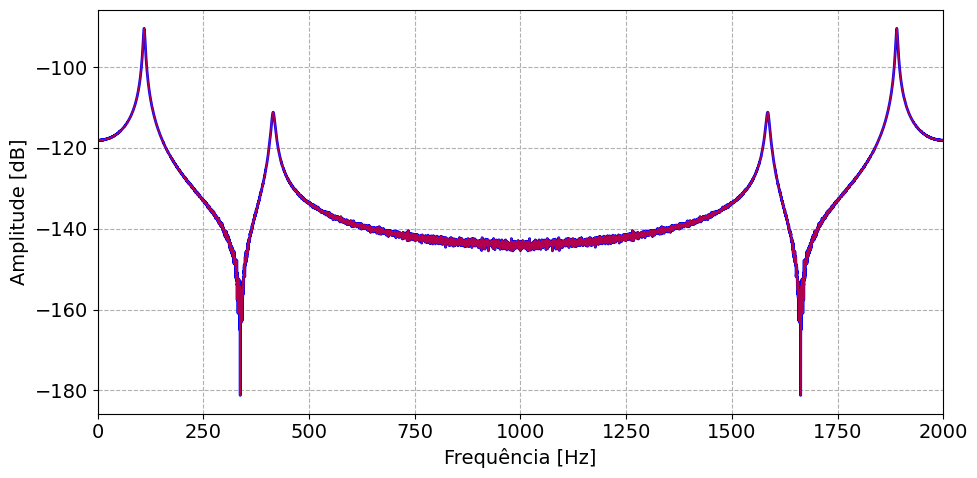

In [28]:
N = len(Xk)
freq = np.linspace(0, (N-1)*fs/N, N)

# Figure
plt.figure(figsize = (10,5))
plt.plot(freq, 20*np.log10(np.abs(Xk/N)), '-b', linewidth = 2, alpha = 1)
plt.plot(freq, 20*np.log10(np.abs(Xk_myfft/N)), '-r', linewidth = 1, alpha = 0.7)
plt.grid(linestyle = '--', which='both')
plt.xlabel('Frequência [Hz]')
plt.ylabel('Amplitude [dB]')
plt.xlim((0, fs))
plt.tight_layout()
plt.show()

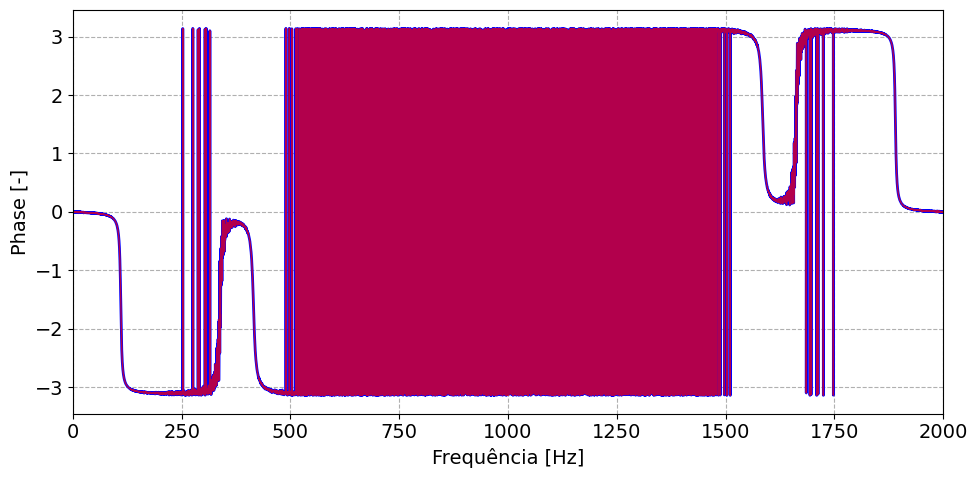

In [29]:
# Figure
plt.figure(figsize = (10,5))
plt.plot(freq, np.angle(Xk/N), '-b', linewidth = 2, alpha = 1)
plt.plot(freq, np.angle(Xk_myfft/N), '-r', linewidth = 1, alpha = 0.7)
plt.grid(linestyle = '--', which='both')
plt.xlabel('Frequência [Hz]')
plt.ylabel('Phase [-]')
plt.xlim((0, fs))
plt.tight_layout()
plt.show()